### Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique. It helps in transforming high-dimensional data into a lower-dimensional form while retaining as much of the original variability as possible. 

The basic idea behind PCA is to identify the principal components, which are linear combinations of the original features that capture the maximum variance in the data.

How PCA works:

1. Centering the Data:
    * The first step is to center the data by subtracting the mean of each feature from the corresponding values. This ensures that the new coordinate system (principal components) is centered at the origin.
2. Compute the Covariance Matrix:
    * Calculate the covariance matrix of the centered data. The covariance matrix gives an indication of how features vary together.
3. Eigenvalue Decomposition:
    * Find the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues indicate the magnitude of variance along each eigenvector.
4. Select Principal Components:
    * Sort the eigenvectors based on their corresponding eigenvalues in descending order. The eigenvectors with the highest eigenvalues (principal components) capture the most variance in the data.
5. Projection:
    * Project the original data onto the selected principal components. This involves computing the dot product of the original data with the selected eigenvectors.

### Projection to Low Dimension
Image credit: ISLR textbook and Zhang et al (2010)
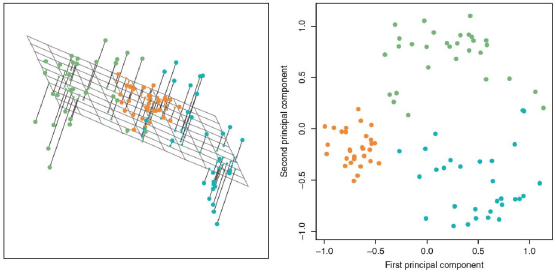

### Normalized Loading Vectors
PCA transformation is a linear combination of original features. The coefficients $\phi_{i, j}$ are called loading vectors and they are normalized, which means that the sum of those squared is going to be one. They work as a weights. That means how important of these features should be in order to define the principal component.

Image credit: Geena Kim, course DTSA 5510

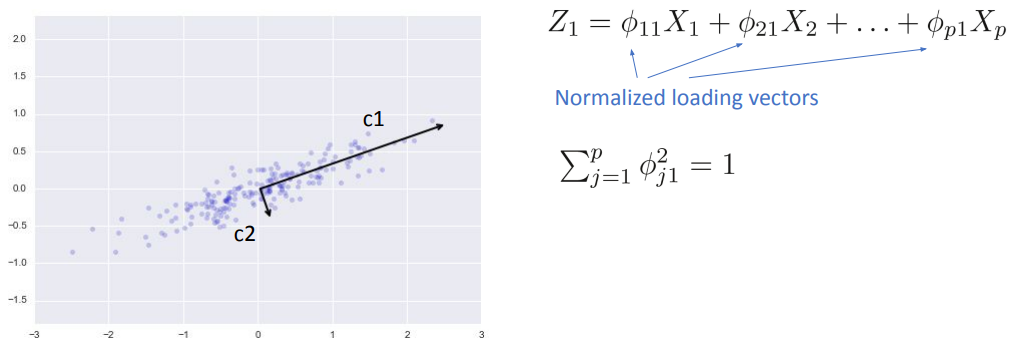

### Visualize Linear Transformation 
Reference: https://www.youtube.com/watch?v=g-Hb26agBFg&list=PLs8w1Cdi-zvZGyT2Rt0ieA0G6xGUqn3Xw&index=3  - PCA - Serano.Academy

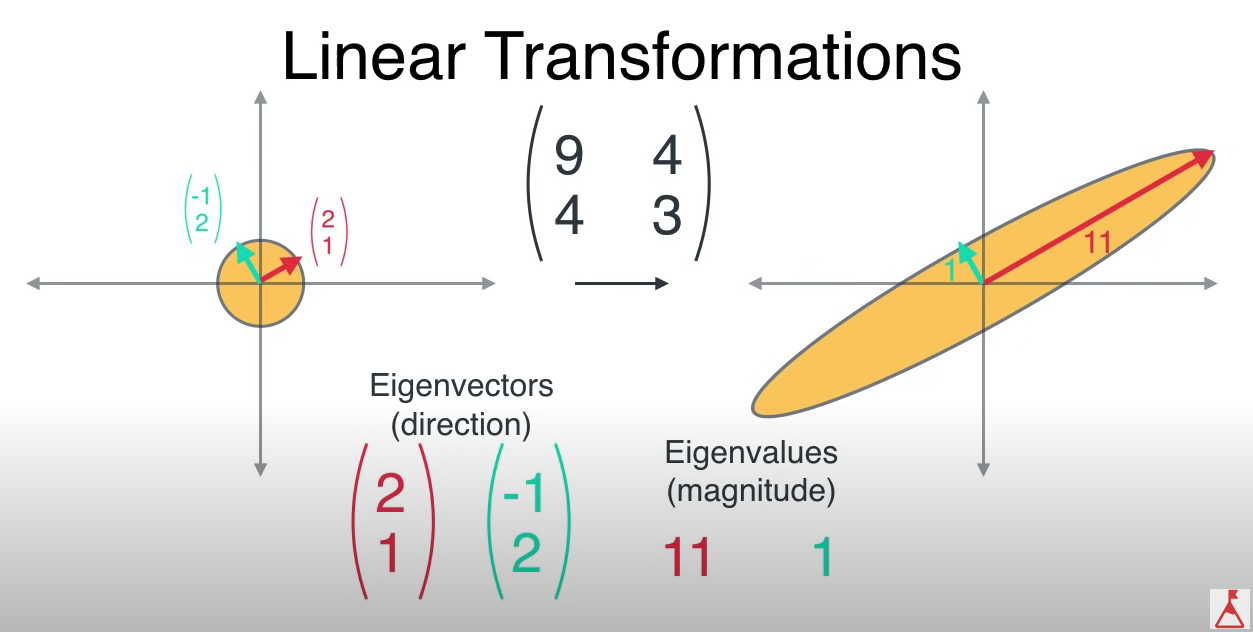

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# the eigenvectors are orthogonal since the covariance matrix is always symmetric
cov_matrix = np.array([[9, 4], [4, 3]])
w, v = np.linalg.eig(cov_matrix)
print('Eigenvalues (magnitude): {}'.format(w))
print('Eigenvectors (direction): {} and {}'.format(np.round(2*v[:, 0], 0), np.round(2*v[:, 1])))

Eigenvalues (magnitude): [11.  1.]
Eigenvectors (direction): [2. 1.] and [-1.  2.]


In [3]:
def plot(A, n=50):
    # create unit circle with 50 points
    x = np.array([[np.cos(2 * np.pi * i / n),
                   np.sin(2 * np.pi * i / n)] for i in range(n)])
    
    y = np.dot(A, x.T).T
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 3), ncols=2)
    ax1.scatter(x[:, 0], x[:, 1])
    ax2.scatter(y[:, 0], y[:, 1])
    
    # draw the direction and magnitude from eigenvectors and eigenvalues
    w, v = np.linalg.eig(A)
    ax2.arrow(0, 0, w[0]*v[0, 0], w[0]*v[1, 0], color='r', width=0.2)
    ax2.arrow(0, 0, w[1]*v[0, 1], w[1]*v[1, 1], color='g', width=0.2)

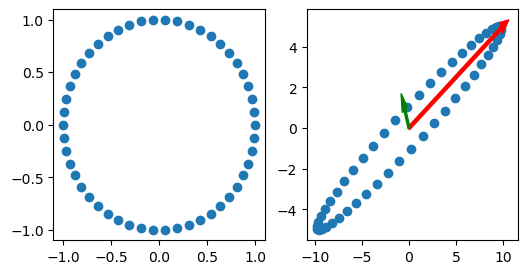

In [4]:
plot(cov_matrix)

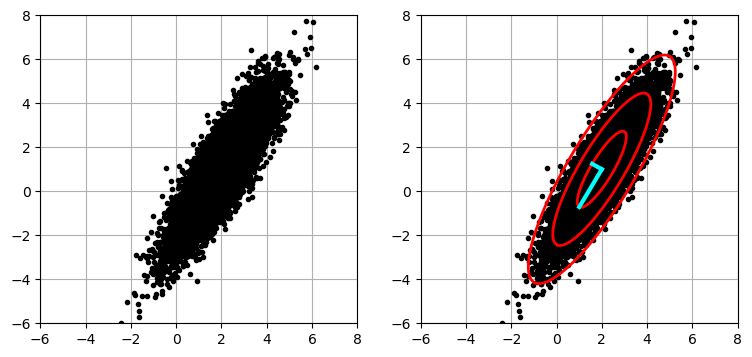

In [13]:
# Code from: https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC05_1_PCAGaussian.ipynb

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000           # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.plot(X[0, :], X[1, :], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

Xavg = np.mean(X, axis=1)                 # Compute mean
B = X - np.tile(Xavg, (nPoints, 1)).T     # Mean-subtracted data

# Find principal components (SVD - Singular Value Decomposition)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints), full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')    # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

theta = 2 * np.pi * np.arange(0, 1, 0.01)

# 1-std, 2-std, 3-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], '-', color='r', linewidth=2)
ax2.plot(Xavg[0] + 2*Xstd[0, :], Xavg[1] + 2*Xstd[1, :], '-', color='r', linewidth=2)
ax2.plot(Xavg[0] + 3*Xstd[0, :], Xavg[1] + 3*Xstd[1, :], '-', color='r', linewidth=2)
#ax2.plot(Xavg[0], Xavg[1], 'x', color='b')

# Plot principal components U[:, 0]S[0] and U[:, 1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0, 0] * S[0]]),
         np.array([Xavg[1], Xavg[1] + U[1, 0] * S[0]]), color='cyan', linewidth=3)
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0, 1] * S[1]]),
         np.array([Xavg[1], Xavg[1] + U[1, 1] * S[1]]), color='cyan', linewidth=3)
plt.show()

In [28]:
# Code from: https://github.com/patrickloeber/MLfromscratch/blob/master/mlfromscratch/pca.py
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)    # mean along the rows of X => mean for each column of X
        X = X - self.mean
        
        # Covariance, function needs samples as columns, hence we transposed X
        cov = np.cov(X.T)
        
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # eigenvector v = [:, i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]    # sort in descending order
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # store the first n eigenvectors
        self.components = eigenvectors[:self.n_components]
        
        
    def transform(self, X):
        # project the data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [6]:
# Testing
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [38]:
plt.rcParams['figure.figsize'] = (5, 3)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


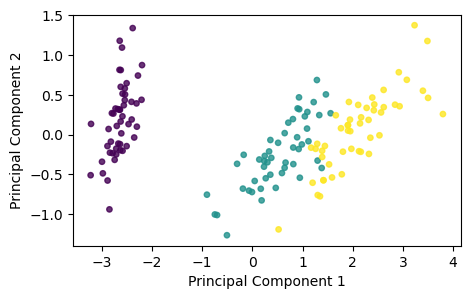

In [64]:
print(Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, alpha=0.8, s=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [2]:
# Use Sklearn's PCA
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

X, y = load_iris(return_X_y=True)
X_mean_centered = X - np.mean(X, axis=0)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_mean_centered)

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,PC1,PC2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755


In [53]:
# check normalized loading vectors
print(pca.components_)
print('norm(1st loading vectors):', np.sqrt(sum(pca.components_[0]**2)))
print('norm(2nd loading vectors):', np.linalg.norm(pca.components_[1]))

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
norm(1st loading vectors): 1.0
norm(2nd loading vectors): 1.0000000000000004


In [58]:
pca.singular_values_

array([25.09996044,  6.01314738])

In [57]:
np.sqrt(sum(df.PC1**2))

25.09996044218387

In [44]:
np.sqrt(sum(df.PC2**2))

6.013147382308733

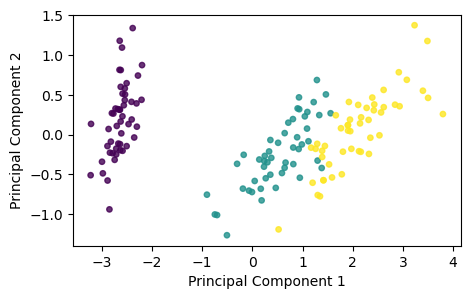

In [59]:
plt.scatter(df.PC1, df.PC2, c=df.species, alpha=0.8, s=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

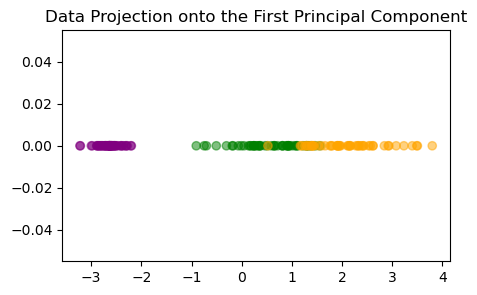

In [60]:
color_map = {0: 'purple', 1: 'green', 2: 'orange'}
colors = [color_map[val] for val in df.species]

plt.scatter(df.PC1, np.zeros_like(df.PC1), color=colors, marker='o', alpha=0.5)
plt.title('Data Projection onto the First Principal Component');

### Explained Variance

In [5]:
pca = PCA()
principal_components = pca.fit_transform(X_mean_centered)

In [6]:
principal_components.shape

(150, 4)

In [40]:
evr = pca.explained_variance_ratio_
print('Explained Variance Ratio: ', evr)

Explained Variance Ratio:  [0.92461872 0.05306648 0.01710261 0.00521218]


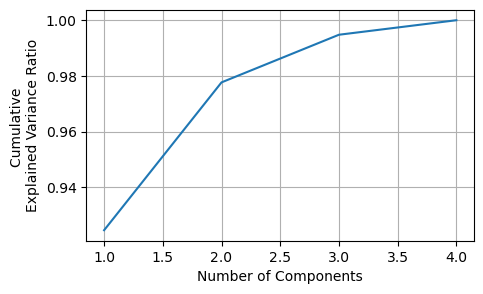

In [44]:
cumulative_evr = [sum(evr[:i+1]) for i in range(len(evr))]

plt.plot(np.arange(1, 5), cumulative_evr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative \nExplained Variance Ratio')
plt.grid();

In [23]:
# Eigenvalues (explained variances) of the principal components
eigenvalues = pca.explained_variance_
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [7]:
# Covariance, function needs samples as columns, hence we transposed X
X_mean_centered = X - np.mean(X, axis=0)
cov = np.cov(X_mean_centered.T)

eigenvalues_, eigenvectors_ = np.linalg.eig(cov)
eigenvalues_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [6]:
eigenvectors = pca.components_
eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [8]:
eigenvectors_  # 1st column == 1st row from pca.components_

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [24]:
eigenvalues / sum(eigenvalues)    # explained variance ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

The singular values are the square roots of the eigenvalues of the covariance matrix of the standardized data. 

$ Explained Variance Ratio = \frac{singular values^{2}}{Total Variance}$ 

where the Total Variance is the sum of the squared singular values

In [22]:
total_var = sum(pca.singular_values_**2)
pca.singular_values_**2 / total_var

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

### PCA with Ames Housing Data

In [4]:
ames = pd.read_csv('ames_housing_cleaned_encoded.scv')

In [6]:
ames.shape

(2925, 229)

In [9]:
ames.head(2)

,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Electrical.1,Kitchen Qual.1,Functional.1,Fireplace Qu.1,Garage Finish.1,Garage Qual.1,Garage Cond.1,Paved Drive.1,Fence.1,SalePrice
0,3.858807,7.353462,24.898884,3,3,2.259674,2.055642,14.119786,14.119786,6.881187,...,5,3,8,4,3,3,3,2,0,12.278393
1,3.858807,6.221214,20.479373,4,3,2.055642,2.259674,14.121376,14.121376,0.000000,...,5,3,8,0,1,3,3,3,3,11.561716


In [7]:
y = ames['SalePrice'].values
X = ames.drop('SalePrice', axis=1).values

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Let's choose 10 principal components
pca = PCA(n_components=10, random_state=42)
pca.fit(X_train_scaled)

PCA(n_components=10, random_state=42)

In [13]:
Z_train = pca.transform(X_train_scaled)
Z_test = pca.transform(X_test_scaled)

In [16]:
X_train_scaled.shape

(2193, 228)

In [15]:
Z_train.shape

(2193, 10)

### Verify that our principal components are not correlated with one another

In [23]:
import seaborn as sns

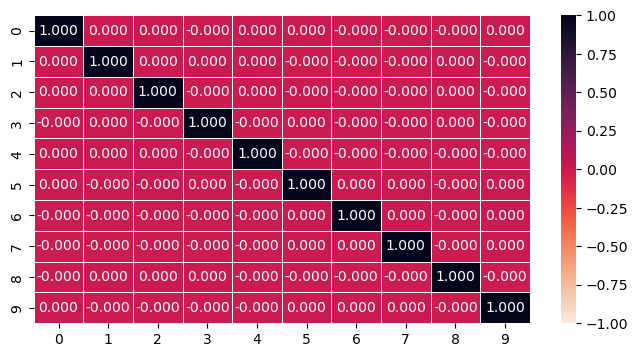

In [35]:
# verify that our principal components are not correlated with one another
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(Z_train).corr(), annot=True, vmin=-1, vmax=1, cmap='rocket_r',
           fmt='.3f', linewidths=0.5, linecolor='white');

### Linear Regression with PCA

In [38]:
# Linear regression using our original scaled data
regressor = LinearRegression().fit(X_train_scaled, y_train)

In [39]:
print('Train R2:', regressor.score(X_train_scaled, y_train))
print('Test R2:', regressor.score(X_test_scaled, y_test))

Train R2: 0.9351389236430641
Test R2: -5.989630680219622e+19


In [45]:
# Linear regression using PCA
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
Z_train = pca.transform(X_train_scaled)
Z_test = pca.transform(X_test_scaled)

regressor = LinearRegression().fit(Z_train, y_train)
print('Train PCA R2:', regressor.score(Z_train, y_train))
print('Test PCA R2:', regressor.score(Z_test, y_test))

Train PCA R2: 0.8434179692716525
Test PCA R2: 0.8548343013329498
